<a href="https://colab.research.google.com/github/GuIsTyping/Clase_PLN/blob/main/Trabajo_en_clase_3/Copia_de_02_Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Preprocesamiento de Texto</h1>

En esta notebook visualizaremos algunos conceptos del preprocesamiento de texto, particularmente:

* Tokenización
* Stemming
* Named Entity Recognition
* POS Tagging

Para esto, estudiaremos algunos ejemplos que serán procesados por las clases del módulo [spaCy](https://spacy.io/). No es una guía minuciosa del uso de este módulo, son solamente algunos ejemplos ilustrativos.

Verificar que la versión de spaCy sea la 3.*

In [ ]:
!python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.7.5                         
Location         /usr/local/lib/python3.11/dist-packages/spacy
Platform         Linux-6.1.85+-x86_64-with-glibc2.35
Python version   3.11.11                       
Pipelines        es_core_news_sm (3.7.0), en_core_web_sm (3.7.1)



In [ ]:
 import spacy

Ya que hemos importado spaCy, necesitamos cargar un modelo estadístico de lenguaje. SpaCy ofrece una variedad de modelos para diferentes idiomas. Estos modelos ayudan con la tokenization, etiquetado PoS (part-of-speech), NER (named entity recognition) y más.

Bajamos y cargamos el modelo estadístico de lenguaje **en_core_web_sm**, es el modelo más pequeño en inglés de spaCy y un buen punto de partida.

Documentación del modelo: https://spacy.io/models/en#en_core_web_sm<br>
Modelos disponibles: https://spacy.io/models<br>
Uso de los modelos: https://spacy.io/usage/models

🔵 Información adicional del modelo

**en_core_web_sm** fué entrenado en el corpus OntoNotes 5, el cual es un corpus anotado que contiene noticias, blogs, transcripciones, etc. Los documentos del corpus están anotados con información de como cada oración debería *parsearse* (parsing), part-of-speech de cada palabra, si cada palabra es una *named entity*, entre otras cosas.

https://catalog.ldc.upenn.edu/LDC2013T19



En principio no hay necesidad de bajarlo, observar en la información del modulo que ya está disponible.

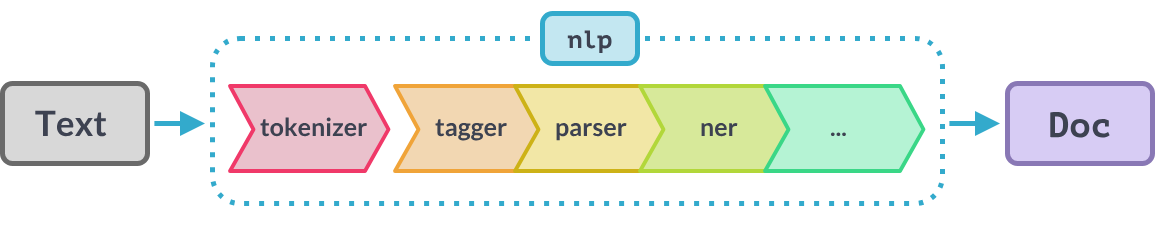

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 78.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('en_core_web_sm')

Ya hemos cargado el modelo, la variable `nlp` hace referencia a una instancia de la clase [`Language`](https://spacy.io/api/language) que contiene metodos para varias tareas (tokenización, etc.) y un pipeline de procesamiento.

Usaremos este modelo de lenguaje para realizar algunas tareas de preprocesamiento de PLN.


In [ ]:
type(nlp)

spacy.lang.en.English

# Tokenización


Al pasar cualquier texto a la instancia `nlp` obtenemos un objeto [`Doc`](https://spacy.io/api/doc) que contiene el texto tokenizado e información adicional para cada [token](https://spacy.io/api/token).

In [ ]:
# Sample sentence.
text = "He didn't want to pay $20 for this book."
doc = nlp(text)
print(doc,'\n',type(doc))

He didn't want to pay $20 for this book. 
 <class 'spacy.tokens.doc.Doc'>


Veamos los tokens

In [ ]:
print([t.text for t in doc])

['He', 'did', "n't", 'want', 'to', 'pay', '$', '20', 'for', 'this', 'book', '.']


Observar que:
- "didn't" se separa en "did" y "n't".
- El símbolo de moneda y el número están separados.
- El punto final es también un token.

Si tokenizaramos sólo considerando los espacios en blanco:

In [ ]:
text.split()

['He', "didn't", 'want', 'to', 'pay', '$20', 'for', 'this', 'book.']

El objeto `Doc` puede ser indexado y *sliced* como si fuera una lista:

In [ ]:
print(doc[0])
print(type(doc[0]))

He
<class 'spacy.tokens.token.Token'>


In [ ]:
print(doc[:3])
print(doc[-5:])

He didn't
20 for this book.


Podemos recuperar el texto original:

In [ ]:
print(doc.text)

He didn't want to pay $20 for this book.


Podemos tokenizar multiples oraciones y accesar a ellas individualmente usando la propiedad `sents` del objeto `Doc`.

In [ ]:
s = """Either the well was very deep, or she fell very slowly, for she
had plenty of time as she went down to look about her and to wonder what
was going to happen next. First, she tried to look down and make out what
she was coming to, but it was too dark to see anything; then she looked at
the sides of the well, and noticed that they were filled with cupboards and
book-shelves; here and there she saw maps and pictures hung upon pegs."""

doc_2 = nlp(s)

for j,sent in enumerate(doc_2.sents):
    print(f"Oración {j}:\n{sent}\n")


Oración 0:
Either the well was very deep, or she fell very slowly, for she
had plenty of time as she went down to look about her and to wonder what
was going to happen next.

Oración 1:
First, she tried to look down and make out what
she was coming to, but it was too dark to see anything; then she looked at
the sides of the well, and noticed that they were filled with cupboards and
book-shelves; here and there she saw maps and pictures hung upon pegs.



In [ ]:
print([token.text for token in doc_2])

['Either', 'the', 'well', 'was', 'very', 'deep', ',', 'or', 'she', 'fell', 'very', 'slowly', ',', 'for', 'she', '\n', 'had', 'plenty', 'of', 'time', 'as', 'she', 'went', 'down', 'to', 'look', 'about', 'her', 'and', 'to', 'wonder', 'what', '\n', 'was', 'going', 'to', 'happen', 'next', '.', 'First', ',', 'she', 'tried', 'to', 'look', 'down', 'and', 'make', 'out', 'what', '\n', 'she', 'was', 'coming', 'to', ',', 'but', 'it', 'was', 'too', 'dark', 'to', 'see', 'anything', ';', 'then', 'she', 'looked', 'at', '\n', 'the', 'sides', 'of', 'the', 'well', ',', 'and', 'noticed', 'that', 'they', 'were', 'filled', 'with', 'cupboards', 'and', '\n', 'book', '-', 'shelves', ';', 'here', 'and', 'there', 'she', 'saw', 'maps', 'and', 'pictures', 'hung', 'upon', 'pegs', '.']


Algunos casos de errores en la tokenización: https://github.com/explosion/spaCy/issues/3052



In [ ]:
texto = '''El Empire State Building es un rascacielos situado en la intersección de la Quinta Avenida con la calle 34 Oeste, en la ciudad de Nueva York (Estados Unidos). Su nombre deriva del apodo del Estado de Nueva York. Fue el edificio más alto del mundo durante cuarenta años, desde su finalización en 1931 hasta 1971, año en que se completó la construcción de la torre norte del World Trade Center. Tras la destrucción del World Trade Center el 11 de septiembre de 2001, el Empire State Building se convirtió nuevamente en el edificio más alto de la ciudad de Nueva York y del Estado de Nueva York, hasta que fue otra vez sobrepasado por One World Trade Center el 30 de abril de 2012, quedando el Empire State en segundo lugar.2​ Actualmente, el Empire State es de los rascacielos más emblemáticos e icónicos del mundo por su historia y su gran altura destacable en el siglo pasado. Incluyendo la antena, su altura es de 443 metros (1453,4 pies) convirtiéndolo en el tercer edificio más alto de la ciudad de Nueva York por detrás de One World Trade Center y Central Park Tower.'''

In [ ]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 38.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("es_core_news_sm")

In [ ]:
import spacy

nlp_sp = spacy.load("es_core_news_sm")

In [ ]:
doc_sp = nlp_sp(texto)

In [ ]:
tokens = [token.text for token in doc_sp]
for token in doc_sp:
  print(token.text)

El
Empire
State
Building
es
un
rascacielos
situado
en
la
intersección
de
la
Quinta
Avenida
con
la
calle
34
Oeste
,
en
la
ciudad
de
Nueva
York
(
Estados
Unidos
)
.
Su
nombre
deriva
del
apodo
del
Estado
de
Nueva
York
.
Fue
el
edificio
más
alto
del
mundo
durante
cuarenta
años
,
desde
su
finalización
en
1931
hasta
1971
,
año
en
que
se
completó
la
construcción
de
la
torre
norte
del
World
Trade
Center
.
Tras
la
destrucción
del
World
Trade
Center
el
11
de
septiembre
de
2001
,
el
Empire
State
Building
se
convirtió
nuevamente
en
el
edificio
más
alto
de
la
ciudad
de
Nueva
York
y
del
Estado
de
Nueva
York
,
hasta
que
fue
otra
vez
sobrepasado
por
One
World
Trade
Center
el
30
de
abril
de
2012
,
quedando
el
Empire
State
en
segundo
lugar.2​
Actualmente
,
el
Empire
State
es
de
los
rascacielos
más
emblemáticos
e
icónicos
del
mundo
por
su
historia
y
su
gran
altura
destacable
en
el
siglo
pasado
.
Incluyendo
la
antena
,
su
altura
es
de
443
metros
(
1453,4
pies
)
convirtiéndolo
en
el
tercer
edificio
más
alt

# Reconocimiento de entidades nombradas (NER)

Podemos buscar entidades nombradas en el texto usando las anotaciones de los tokens

In [ ]:
entities = list(doc.ents)

print(entities)
print(entities[0].label_)

[20]
MONEY


In [ ]:
doc_3 = nlp('''I have $20 worth of things to buy in New York city,
I can afford more things in Mexico or Latin America, certainly not the Starry Night painting though.
Lastly, I think I met Zeus at a McKenzie group consulting meeting in NYC last summer.''')

[(x,x.label_) for x in list(doc_3.ents)]

[(I, 'MISC'),
 (in Mexico or Latin America, 'MISC'),
 (certainly not the Starry Night, 'LOC'),
 (Lastly, 'PER'),
 (Zeus at a McKenzie, 'MISC')]

Observa que el NER no agrupa tokens juntos, estas agrupaciones se hacen de forma separada en el atributo `ents`.

In [ ]:
[x.text for x in doc_3]

['I',
 'have',
 '$',
 '20',
 'worth',
 'of',
 'things',
 'to',
 'buy',
 'in',
 'New',
 'York',
 'city',
 ',',
 '\n',
 'I',
 'can',
 'afford',
 'more',
 'things',
 'in',
 'Mexico',
 'or',
 'Latin',
 'America',
 ',',
 'certainly',
 'not',
 'the',
 'Starry',
 'Night',
 'painting',
 'though',
 '.',
 '\n',
 'Lastly',
 ',',
 'I',
 'think',
 'I',
 'met',
 'Zeus',
 'at',
 'a',
 'McKenzie',
 'group',
 'consulting',
 'meeting',
 'in',
 'NYC',
 'last',
 'summer',
 '.']

Algunas etiquetas de las entidades son:

* PERSON People, including fictional
* NORP Nationalities or religious or political groups
* FACILITY Buildings, airports, highways, bridges, etc.
* ORGANIZATION Companies, agencies, institutions, etc.
* GPE Countries, cities, states
* LOCATION Non-GPE locations, mountain ranges, bodies of water
* PRODUCT Vehicles, weapons, foods, etc. (Not services)
* EVENT Named hurricanes, battles, wars, sports events, etc.
* WORK OF ART Titles of books, songs, etc.
* LAW Named documents made into laws
* LANGUAGE Any named language

In [ ]:
spacy.explain('GPE')

'Countries, cities, states'

Spacy cuenta con algunos visualizadores para NER y otras tareas.

https://spacy.io/usage/visualizers

In [ ]:
from spacy import displacy

displacy.render(doc_3, style='ent', jupyter=True)

Podemos obtener, además, los índices de cada entidad en el texto original.

In [ ]:
print([(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc_3.ents])

[('I', 'MISC', 0, 1), ('in Mexico or Latin America', 'MISC', 77, 103), ('certainly not the Starry Night', 'LOC', 105, 135), ('Lastly', 'PER', 153, 159), ('Zeus at a McKenzie', 'MISC', 175, 193)]


Para corpus domain-specific, un etiquetador NER puede ser afinado. En este ejemplo sería bueno que _The Martian_ fuera etiquetado como "FILM".

🔵 Esto puede aparecer más adelante en los ejercicios y en el curso.

In [ ]:
s = "Ridley Scott directed The Martian."
doc = nlp(s)
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
spacy.explain('NORP')

'Nationalities or religious or political groups'

In [ ]:
print([(ent.text, ent.label_) for ent in doc_sp.ents])

[('Empire State Building', 'LOC'), ('Quinta Avenida', 'LOC'), ('Nueva York', 'LOC'), ('Estados Unidos', 'LOC'), ('Estado de Nueva York', 'LOC'), ('año', 'MISC'), ('World Trade Center', 'LOC'), ('World Trade Center', 'LOC'), ('Empire State Building', 'LOC'), ('Estado de Nueva York', 'LOC'), ('One World Trade Center', 'MISC'), ('Empire State', 'LOC'), ('Actualmente', 'LOC'), ('Empire State', 'LOC'), ('Nueva York', 'LOC'), ('One World Trade Center', 'MISC'), ('Central Park Tower', 'LOC')]


In [ ]:
from spacy import displacy

displacy.render(doc_sp, style='ent', jupyter=True)

## Ejercicios



### 1. Exploración descriptiva de documentos mediante tokenización

En este primer ejemplo describiremos el contenido de varios documentos que tratan sobre baseball. Exploraremos los términos más frecuentes mediante la construcción de una nube de palabras. Haremos el ejercicios usando, y sin usar, tokenización.

In [ ]:
!pip install -qq wordcloud

In [ ]:
from sklearn.datasets import fetch_20newsgroups

docs_newsgroups = fetch_20newsgroups(subset='train',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=['rec.sport.baseball']
                                     )

lista_docs_20ng = docs_newsgroups.data
print(f"{len(lista_docs_20ng)} documentos")

597 documentos


Sin tokenizar:

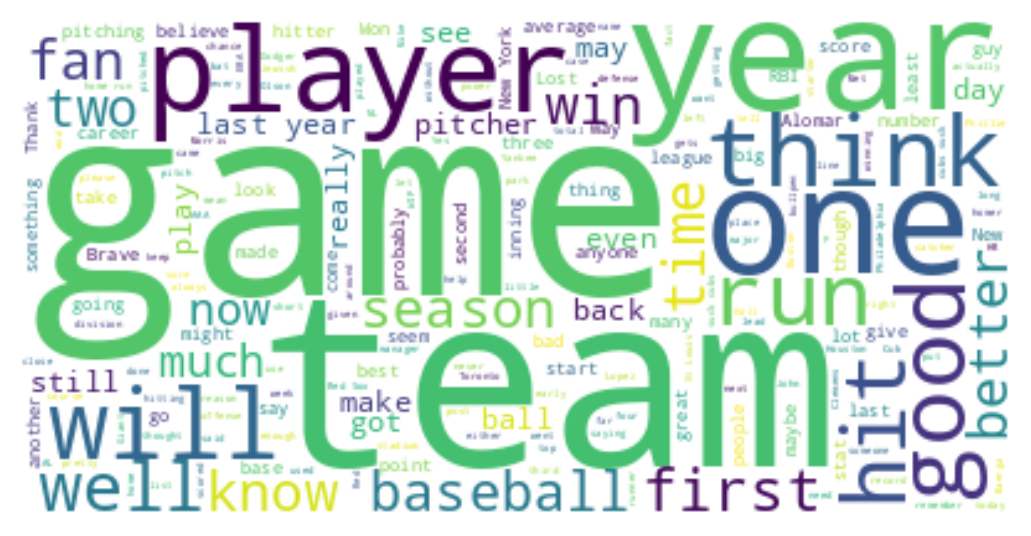

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white")
wc_img = wc.generate(" ".join(lista_docs_20ng))

plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

Tokenizando:

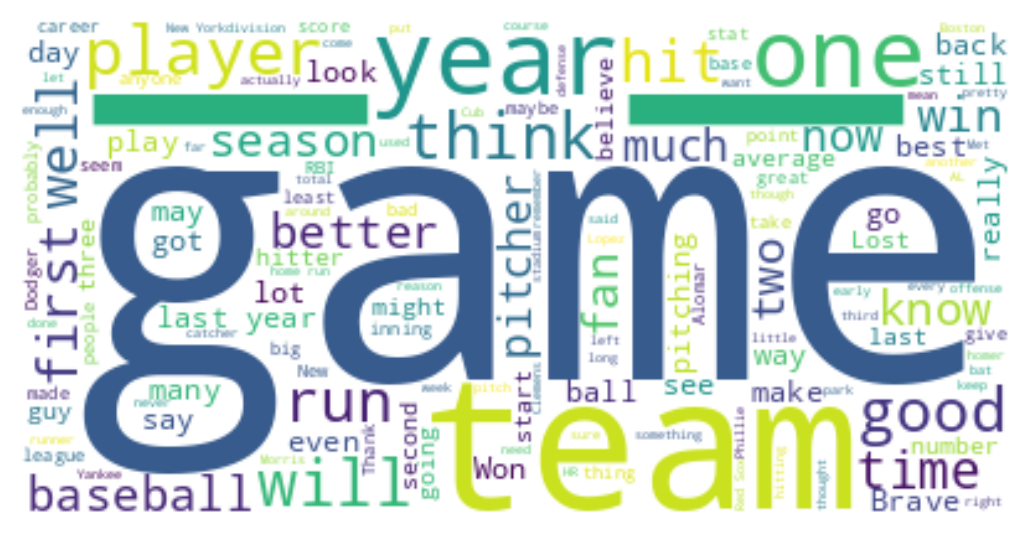

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

docs_spacy = nlp(" ".join(lista_docs_20ng))
lista_tokens = [t.text for t in docs_spacy]

wc = WordCloud(background_color="white")
wc_img = wc.generate(" ".join(lista_tokens))

plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

Tokenizar y quitar palabras *problemáticas* (stop-words):

In [ ]:
from collections import Counter

dict(sorted(Counter(lista_tokens).items(), key=lambda x: x[1], reverse=True))

{'\n': 5004,
 ' ': 3983,
 '.': 3783,
 ',': 3756,
 'the': 3164,
 'a': 1455,
 'to': 1454,
 'and': 1214,
 'of': 1105,
 'in': 1055,
 '  ': 1037,
 'I': 978,
 '\n\n': 921,
 ')': 827,
 'is': 822,
 'that': 783,
 '(': 654,
 '?': 570,
 '   ': 561,
 'for': 552,
 '*': 542,
 'have': 489,
 'he': 479,
 '"': 471,
 '_': 469,
 'was': 462,
 'be': 431,
 'on': 411,
 'at': 385,
 'it': 381,
 'with': 378,
 'you': 358,
 '!': 358,
 'this': 349,
 'but': 336,
 'are': 333,
 'as': 331,
 'The': 326,
 '    ': 323,
 '\t': 322,
 'his': 309,
 'they': 294,
 'not': 291,
 ':': 284,
 '1': 281,
 'year': 275,
 'or': 242,
 '0': 236,
 'has': 230,
 'up': 226,
 'if': 220,
 '\n\n\n': 215,
 'out': 207,
 'would': 207,
 '\n ': 207,
 'will': 199,
 'game': 192,
 'had': 188,
 'one': 186,
 'think': 186,
 'than': 185,
 'good': 183,
 'who': 181,
 "'": 180,
 'more': 179,
 'team': 178,
 '2': 178,
 'so': 174,
 'an': 174,
 'all': 173,
 'last': 170,
 '3': 169,
 'by': 163,
 "don't": 161,
 'about': 156,
 '--': 156,
 'can': 156,
 '----': 152,
 'ga

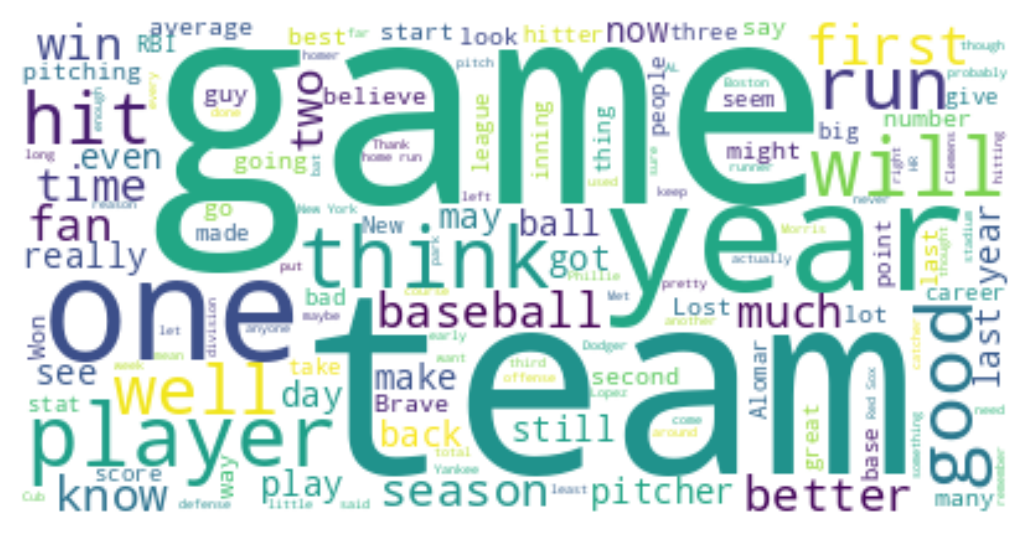

In [ ]:
lista_tokens = [t.text for t in docs_spacy
                if t.text not in ["n't","."," ","'s","_","\n"]]

wc = WordCloud(background_color="white")
wc_img = wc.generate(" ".join(lista_tokens))
plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

### Imprime una lista de todas las entidades nombradas que aparecen en estos documentos

Al ser de baseball podrían aparecer nombres de jugadores y equipos, ¿el NER los atrapa?

# Atributos adicionales de los tokens


spaCy realiza un pipeline de preprocesamiento (excepto el stemming) de forma *oculta*. De acuerdo con su política no destructiva, los tokens no se modifican directamente. Más bien, cada objeto **Token** tiene una serie de atributos que pueden ayudarle a obtener versiones del documento con ciertos pasos de preprocesamiento aplicados. Los atributos que tiene un **Token** se pueden encontrar aquí:<br>
https://spacy.io/api/token#attributes
<br><br>
More information about spaCy's processing pipeline:<br>
https://spacy.io/usage/processing-pipelines

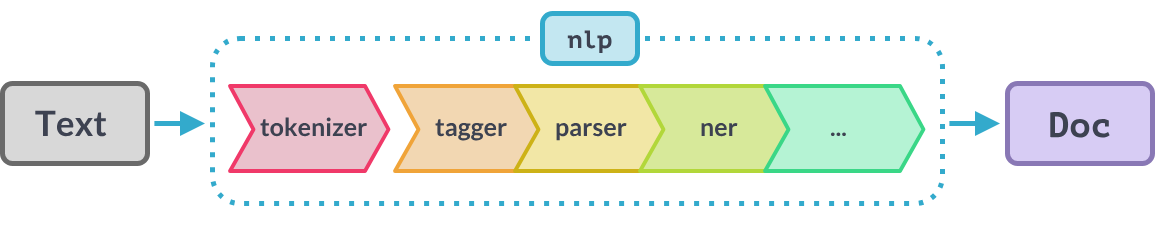

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

s = "Scientists have developed a new, more energy-efficient way for AI algorithms to process data. His model may become the basis for a new generation of AI that learns like we do."
doc = nlp(s)

Probemos algunos atributos de algunos tokens

In [ ]:
doc[0].ent_id_, doc[0].lemma_

('', 'scientist')

## Mayúsculas/Minúsculas

Podemos escribir los tokens en minúsculas:

In [ ]:
print([t.lower_ for t in doc])

['scientists', 'have', 'developed', 'a', 'new', ',', 'more', 'energy', '-', 'efficient', 'way', 'for', 'ai', 'algorithms', 'to', 'process', 'data', '.', 'his', 'model', 'may', 'become', 'the', 'basis', 'for', 'a', 'new', 'generation', 'of', 'ai', 'that', 'learns', 'like', 'we', 'do', '.']


Esto nos da flexibilidad para realizar otras tareas, como no cambiar a minúscula si es el inicio de una oración.

In [ ]:
print([t.lower_ if not t.is_sent_start else t for t in doc])

[Scientists, 'have', 'developed', 'a', 'new', ',', 'more', 'energy', '-', 'efficient', 'way', 'for', 'ai', 'algorithms', 'to', 'process', 'data', '.', His, 'model', 'may', 'become', 'the', 'basis', 'for', 'a', 'new', 'generation', 'of', 'ai', 'that', 'learns', 'like', 'we', 'do', '.']


# Stop Word Removal

Las stop words son palabras de una lista (stoplist) que se filtran antes o después del procesamiento de texto ya que se consideran insignificantes.

spaCy incluye una lista por default de stop words. Observa que cada token viene anotado con el atributo `is_stop`.

In [ ]:
print([t for t in doc if not t.is_stop])

[Scientists, developed, new, ,, energy, -, efficient, way, AI, algorithms, process, data, ., model, basis, new, generation, AI, learns, like, .]


Pdemos ver todas las stopwords. Podemos recuperarlas desde el módulo de spacy, o desde el modelo de lenguaje.

In [ ]:
from spacy.lang.en import stop_words

# --- Manera 1
stop_words = stop_words.STOP_WORDS
print(stop_words)

# --- Manera 2
stop_words_model = nlp.Defaults.stop_words
print(stop_words_model)
print(len(nlp.Defaults.stop_words))

{'not', 'already', 'one', 'that', 'whatever', 'really', 'each', 'must', 'than', 'beyond', 'did', 'n’t', 'full', 'of', 'we', 'fifty', 'are', 're', 'mine', 'beforehand', 'nothing', 'unless', 'five', 'all', 'make', 'sometimes', '‘ve', 'seemed', 'own', 'only', 'since', '‘re', 'could', 'then', 'sometime', 'cannot', 'in', 'does', 'see', 'sixty', 'indeed', 'across', 'call', 'be', 'after', 'though', 'or', '’s', 'thus', 'get', 'regarding', 'yet', 'keep', 'something', 'whereas', 'an', 'many', 'front', 'meanwhile', 'without', 'due', '‘m', "'ve", 'what', 'she', 'hers', 'them', 'wherever', 'how', 'behind', 'this', 'hundred', 'another', 'can', '’m', 'anything', 'became', 'every', 'where', 'us', 'above', 'empty', 'were', 'by', 'who', 'whose', 'ever', 'upon', '’ve', "'d", 'n‘t', 'bottom', 'would', 'yourself', 'least', 'show', 'their', 'towards', 'top', 'noone', 'to', 'whether', 'forty', 'it', 'whole', 'whoever', 'hereupon', 'name', 'various', 'whereupon', 'however', 'just', 'being', 'used', 'amount', 

Exploremos los signos de puntuación:

In [ ]:
from string import punctuation

punctuations = list(punctuation)
print(punctuations)
print(len(punctuations))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
32


In [ ]:
from spacy.lang.es import stop_words

STOP_WORD_sp = stop_words.STOP_WORDS
print(STOP_WORD_sp)
print(len(STOP_WORD_sp))

{'hasta', 'ningún', 'poder', 'él', 'sus', 'aquí', 'aquellos', 'da', 'estamos', 'primeros', 'consiguen', 'parte', 'podrían', 'podrá', 'ha', 'sabe', 'arriba', 'ciertos', 'menudo', 'ante', 'alrededor', 'tan', 'mio', 'sigue', 'nos', 'su', 'vosotras', 'varios', 'pueda', 'segunda', 'que', 'encuentra', 'ése', 'va', 'eres', 'son', 'informó', 'tendrá', 'tienen', 'sea', 'unas', 'sera', 'entre', 'todo', 'vamos', 'usan', 'debajo', 'gran', 'temprano', 'usar', 'cualquier', 'dijeron', 'consigues', 'siempre', 'último', 'ni', 'grande', 'seis', 'cuántas', 'usa', 'estado', 'las', 'casi', 'podeis', 'buenas', 'pasado', 'somos', 'cuenta', 'ademas', 'sólo', 'ellas', 'tampoco', 'algunos', 'aqui', 'ocho', 'dar', 'tenido', 'además', 'vuestra', 'pocas', 'propio', 'estas', 'tú', 'sola', 'alli', 'través', 'allí', 'fui', 'ahora', 'cuándo', 'primero', 'tuya', 'aquélla', 'uso', 'junto', 'qeu', 'cuatro', 'van', 'tras', 'esas', 'mucho', 'bueno', 'estados', 'mios', 'queremos', 'unos', 'pues', 'últimos', 'les', 'podrias'

In [ ]:
'unos' in STOP_WORD_sp

True

Además de quitar stop words también podemos quitar los signos de puntuación. Comparemos la versión inicial y esta versión *limpia*.

In [ ]:
print(s)
clean = [t.text for t in doc if not t.is_stop and t.text not in punctuations]
print(" ".join(clean))

Scientists have developed a new, more energy-efficient way for AI algorithms to process data. His model may become the basis for a new generation of AI that learns like we do.
Scientists developed new energy efficient way AI algorithms process data model basis new generation AI learns like


## Stopwords con NLTK

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print(stopwords.words('english'))
print(len(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Veamos en qué palabras coinciden ambas listados de stopwords.

In [ ]:
from spacy.lang.en import stop_words
from nltk.corpus import stopwords

stop_words_spacy = stop_words.STOP_WORDS
stop_words_nltk = stopwords.words('english')

print(f"Spacy: {len(stop_words_spacy)}")
print(f"NLTK: {len(stop_words_nltk)}")

coincidencias = list(set(stop_words_spacy).intersection(set(stop_words_nltk)))
print(f"Intersección: {len(coincidencias)}")
print(coincidencias)

Spacy: 326
NLTK: 179
Intersección: 123
['me', 'not', 'where', 'that', 'above', 'were', 'by', 'each', 'than', 'herself', 'who', 'while', 'did', 'once', 'over', 'doing', 'of', 'we', 'few', 'now', 'between', 'same', 'been', 'some', 'are', 're', 'there', 'yourself', 'their', 'they', 'during', 'to', 'all', 'here', 'it', 'do', 'until', 'just', 'own', 'being', 'but', 'only', 'such', 'ours', 'then', 'into', 'because', 'very', 'in', 'my', 'does', 'both', 'myself', 'yours', 'under', 'is', 'too', 'other', 'be', 'most', 'after', 'has', 'or', 'any', 'themselves', 'which', 'a', 'the', 'off', 'these', 'with', 'again', 'itself', 'your', 'below', 'more', 'i', 'as', 'further', 'our', 'nor', 'yourselves', 'an', 'about', 'before', 'have', 'if', 'on', 'why', 'him', 'for', 'his', 'so', 'himself', 'ourselves', 'out', 'what', 'she', 'had', 'hers', 'he', 'at', 'them', 'from', 'through', 'was', 'will', 'when', 'up', 'against', 'how', 'this', 'am', 'her', 'and', 'whom', 'down', 'should', 'you', 'can', 'its', 'th

# Lematización

La **lematización** es el proceso de reducir una palabra a su forma base (lema). Se utiliza para:

* Reducir la dimensionalidad del espacio de características, al mapear palabras relacionadas a un solo lema.
* Mejorar la precisión de los modelos de lenguaje, al tratar palabras con el mismo significado como una sola entidad.
* Facilitar la comparación y el análisis de textos, al estandarizar la forma de las palabras.

In [ ]:
[(t.text, t.lemma_) for t in doc]

[('Morey', 'Morey'),
 ('successfully', 'successfully'),
 ('auditioned', 'audition'),
 ('for', 'for'),
 ('the', 'the'),
 ('role', 'role'),
 ('of', 'of'),
 ('Sonya', 'Sonya'),
 ('and', 'and'),
 ('joined', 'join'),
 ('the', 'the'),
 ('cast', 'cast'),
 ('in', 'in'),
 ('June', 'June'),
 ('2009', '2009'),
 ('in', 'in'),
 ('a', 'a'),
 ('recurring', 'recur'),
 ('capacity', 'capacity'),
 ('.', '.'),
 ('Morey', 'Morey'),
 ('made', 'make'),
 ('her', 'her'),
 ('first', 'first'),
 ('screen', 'screen'),
 ('appearance', 'appearance'),
 ('as', 'as'),
 ('Sonya', 'Sonya'),
 ('during', 'during'),
 ('the', 'the'),
 ('episode', 'episode'),
 ('broadcast', 'broadcast'),
 ('on', 'on'),
 ('14', '14'),
 ('August', 'August'),
 ('2009', '2009'),
 ('.', '.'),
 ('The', 'the'),
 ('show', 'show'),
 ("'s", "'s"),
 ('producers', 'producer'),
 ('noticed', 'notice'),
 ('the', 'the'),
 ('chemistry', 'chemistry'),
 ('between', 'between'),
 ('Moloney', 'Moloney'),
 ('and', 'and'),
 ('Morey', 'Morey'),
 ("'s", "'s"),
 ('char

Veamos los que cambiaron:

In [ ]:
[(t.text, t.lemma_) for t in doc if t.text != t.lemma_]

[('Scientists', 'scientist'),
 ('developed', 'develop'),
 ('algorithms', 'algorithm'),
 ('data', 'datum'),
 ('His', 'his'),
 ('learns', 'learn')]

# Etiquetado Part-of-Speech


spaCy realiza, como parte de su pipeline, el etiquetado Part-of-Speech (POS).

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
s = "John watched an old movie at the cinema."
doc = nlp(s)

Las etiquetas POS se pueden ver en el atributo `pos_`

In [ ]:
[(t.text, t.pos_) for t in doc]

[('John', 'PROPN'),
 ('watched', 'VERB'),
 ('an', 'DET'),
 ('old', 'ADJ'),
 ('movie', 'NOUN'),
 ('at', 'ADP'),
 ('the', 'DET'),
 ('cinema', 'NOUN'),
 ('.', 'PUNCT')]

Con `spacy.explain` podemos obtener una descripción de las abreviaturas.

In [ ]:
spacy.explain('PROPN')

'proper noun'

Contemos cada POS diferente

In [ ]:
from collections import Counter

Counter([t.pos_ for t in doc])

Counter({'PROPN': 1,
         'VERB': 1,
         'DET': 2,
         'ADJ': 1,
         'NOUN': 2,
         'ADP': 1,
         'PUNCT': 1})

## Ejemplo en español

In [ ]:
texto

'El Empire State Building es un rascacielos situado en la intersección de la Quinta Avenida con la calle 34 Oeste, en la ciudad de Nueva York (Estados Unidos). Su nombre deriva del apodo del Estado de Nueva York. Fue el edificio más alto del mundo durante cuarenta años, desde su finalización en 1931 hasta 1971, año en que se completó la construcción de la torre norte del World Trade Center. Tras la destrucción del World Trade Center el 11 de septiembre de 2001, el Empire State Building se convirtió nuevamente en el edificio más alto de la ciudad de Nueva York y del Estado de Nueva York, hasta que fue otra vez sobrepasado por One World Trade Center el 30 de abril de 2012, quedando el Empire State en segundo lugar.2\u200b Actualmente, el Empire State es de los rascacielos más emblemáticos e icónicos del mundo por su historia y su gran altura destacable en el siglo pasado. Incluyendo la antena, su altura es de 443 metros (1453,4 pies) convirtiéndolo en el tercer edificio más alto de la ci

In [ ]:
for token in nlp_sp(texto):
  print(f"{token.text}\t{token.pos_}\t{token.ent_type_}")

El	DET	
Empire	PROPN	LOC
State	PROPN	LOC
Building	PROPN	LOC
es	AUX	
un	DET	
rascacielos	NOUN	
situado	ADJ	
en	ADP	
la	DET	
intersección	NOUN	
de	ADP	
la	DET	
Quinta	ADJ	LOC
Avenida	PROPN	LOC
con	ADP	
la	DET	
calle	NOUN	
34	NUM	
Oeste	PROPN	
,	PUNCT	
en	ADP	
la	DET	
ciudad	NOUN	
de	ADP	
Nueva	PROPN	LOC
York	PROPN	LOC
(	PUNCT	
Estados	PROPN	LOC
Unidos	PROPN	LOC
)	PUNCT	
.	PUNCT	
Su	DET	
nombre	NOUN	
deriva	NOUN	
del	ADP	
apodo	NOUN	
del	ADP	
Estado	PROPN	LOC
de	ADP	LOC
Nueva	PROPN	LOC
York	PROPN	LOC
.	PUNCT	
Fue	AUX	
el	DET	
edificio	NOUN	
más	ADV	
alto	ADJ	
del	ADP	
mundo	NOUN	
durante	ADP	
cuarenta	NUM	
años	NOUN	
,	PUNCT	
desde	ADP	
su	DET	
finalización	NOUN	
en	ADP	
1931	NOUN	
hasta	ADP	
1971	NOUN	
,	PUNCT	
año	NOUN	MISC
en	ADP	
que	PRON	
se	PRON	
completó	VERB	
la	DET	
construcción	NOUN	
de	ADP	
la	DET	
torre	NOUN	
norte	ADJ	
del	ADP	
World	PROPN	LOC
Trade	PROPN	LOC
Center	PROPN	LOC
.	PUNCT	
Tras	ADP	
la	DET	
destrucción	NOUN	
del	ADP	
World	PROPN	LOC
Trade	PROPN	LOC
Center	PROPN	LO

# Stemming

El stemming no está implementado en spacy, en NLTK sí.

[Un vistazo al algoritmo de stemming Porter](https://www.nltk.org/_modules/nltk/stem/porter.html)

In [ ]:
import nltk
from nltk.stem import PorterStemmer

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
text = "The quick brown fox jumps over the lazy dog"
text = "El Empire State Building es un rascacielos situado en la intersección de la Quinta Avenida con la calle 34 Oeste, en la ciudad de Nueva York (Estados Unidos). Su nombre deriva del apodo del Estado de Nueva York. Fue el edificio más alto del mundo durante cuarenta años, desde su finalización en 1931 hasta 1971, año en que se completó la construcción de la torre norte del World Trade Center. Tras la destrucción del World Trade Center el 11 de septiembre de 2001, el Empire State Building se convirtió nuevamente en el edificio más alto de la ciudad de Nueva York y del Estado de Nueva York, hasta que fue otra vez sobrepasado por One World Trade Center el 30 de abril de 2012, quedando el Empire State en segundo lugar.2​ Actualmente, el Empire State es de los rascacielos más emblemáticos e icónicos del mundo por su historia y su gran altura destacable en el siglo pasado. Incluyendo la antena, su altura es de 443 metros (1453,4 pies) convirtiéndolo en el tercer edificio más alto de la ciudad de Nueva York por detrás de One World Trade Center y Central Park Tower."

# Tokenización del texto
words = nltk.word_tokenize(text)

# Crear una instancia del stemmer
stemmer = PorterStemmer()

# Realizar stemming
stemmed_words = [stemmer.stem(word) for word in words]

print(f"Texto original:\n{text}")
print(f"Texto stemmed:\n{' '.join(stemmed_words)}")

Texto original:
El Empire State Building es un rascacielos situado en la intersección de la Quinta Avenida con la calle 34 Oeste, en la ciudad de Nueva York (Estados Unidos). Su nombre deriva del apodo del Estado de Nueva York. Fue el edificio más alto del mundo durante cuarenta años, desde su finalización en 1931 hasta 1971, año en que se completó la construcción de la torre norte del World Trade Center. Tras la destrucción del World Trade Center el 11 de septiembre de 2001, el Empire State Building se convirtió nuevamente en el edificio más alto de la ciudad de Nueva York y del Estado de Nueva York, hasta que fue otra vez sobrepasado por One World Trade Center el 30 de abril de 2012, quedando el Empire State en segundo lugar.2​ Actualmente, el Empire State es de los rascacielos más emblemáticos e icónicos del mundo por su historia y su gran altura destacable en el siglo pasado. Incluyendo la antena, su altura es de 443 metros (1453,4 pies) convirtiéndolo en el tercer edificio más alt


1. Escoge un parrafo(s) de un artículo de wikipedia en inglés (al menos 15 líneas). Realiza las siguientes tareas:
 * Quita todas las citas de la forma [1], [2], etc. Usa expresiones regulares.
 * Quita todos los saltos de línea. Usa expresiones regulares.
 * Quita todo el texto entre comillas, paréntesis. Usa expresiones regulares.
 * Usando spacy, tokeniza el texto. Además, desecha los signos de puntuación.
 * Forma una nueva string juntando los tokens que obtuviste en el paso anterior, los tokens deben estar lematizados y en minúscula. Usa Spacy.
 * Imprime el texto original y el texto *limpio* que obtuviste para que los compares.

Puedes usar el link https://en.wikipedia.org/wiki/Special:Random.

2. Con el mismo texto del punto anterior repite el proceso, ahora usa NLTK en los puntos 4 y 5. Después del punto 6, imprime las versiones *limpias* obtenidas con Spacy y con NLTK, ¿son iguales?




# Referencias Adicionales

* Curso [spaCy 101: Everything you need to know](https://spacy.io/usage/spacy-101).
* [NLTK](https://www.nltk.org/) (**N**atural **L**anguage **T**ool**K**it) es otro módulo para tareas de NLP.  Contiene, por ejemplo, los tokenizadores `TreebankWordTokenizer` y `word_tokenize`.
* [Core-NLP](https://stanfordnlp.github.io/CoreNLP/) es una suite para tareas de NLP, está escrita en Java, por lo que no se puede usar directamente en Python. Puedes usar el [demo online](https://corenlp.run/).

In [ ]:
og_text = r'''Morey successfully auditioned for the role of Sonya and joined the cast in June 2009 in a recurring capacity.[3][4] Morey made her first screen appearance as Sonya during the episode broadcast on 14 August 2009.[5] The show's producers noticed the chemistry between Moloney and Morey's characters,[3] and Morey was promoted to the regular cast a year later. A writer for Holy Soap said that viewers would be seeing a lot more of Sonya in the future.[6][7] In February 2011, Morey signed a new contract to stay with Neighbours for another year.[8] She told the Daily Star, "It was great to know I'd be working for a year – from a struggling actor's point of view that is fantastic. But it also meant there is a year's worth of developing the character because she will become part of the bigger storylines instead of supporting."[8] Morey added that she was loving her time on the show and the people she was working with.[8] Morey took maternity leave from the show in 2014 after giving birth to her first child. Sonya made a temporary departure to visit her son in the United States.[9] In July 2017, Morey announced that she was pregnant with her second child. Producers chose not to write her pregnancy into the show, and Sonya made a temporary departure during 29 January 2018 for Morey's maternity leave.[10]'''

In [ ]:
#Declarando variable para almacenar texto
text = r'''Morey successfully auditioned for the role of Sonya and joined the cast in June 2009 in a recurring capacity.[3][4] Morey made her first screen appearance as Sonya during the episode broadcast on 14 August 2009.[5] The show's producers noticed the chemistry between Moloney and Morey's characters,[3] and Morey was promoted to the regular cast a year later. A writer for Holy Soap said that viewers would be seeing a lot more of Sonya in the future.[6][7] In February 2011, Morey signed a new contract to stay with Neighbours for another year.[8] She told the Daily Star, "It was great to know I'd be working for a year – from a struggling actor's point of view that is fantastic. But it also meant there is a year's worth of developing the character because she will become part of the bigger storylines instead of supporting."[8] Morey added that she was loving her time on the show and the people she was working with.[8] Morey took maternity leave from the show in 2014 after giving birth to her first child. Sonya made a temporary departure to visit her son in the United States.[9] In July 2017, Morey announced that she was pregnant with her second child. Producers chose not to write her pregnancy into the show, and Sonya made a temporary departure during 29 January 2018 for Morey's maternity leave.[10]'''

In [ ]:
print(text)

Morey successfully auditioned for the role of Sonya and joined the cast in June 2009 in a recurring capacity.[3][4] Morey made her first screen appearance as Sonya during the episode broadcast on 14 August 2009.[5] The show's producers noticed the chemistry between Moloney and Morey's characters,[3] and Morey was promoted to the regular cast a year later. A writer for Holy Soap said that viewers would be seeing a lot more of Sonya in the future.[6][7] In February 2011, Morey signed a new contract to stay with Neighbours for another year.[8] She told the Daily Star, "It was great to know I'd be working for a year – from a struggling actor's point of view that is fantastic. But it also meant there is a year's worth of developing the character because she will become part of the bigger storylines instead of supporting."[8] Morey added that she was loving her time on the show and the people she was working with.[8] Morey took maternity leave from the show in 2014 after giving birth to her 

In [ ]:
#quitando las citas de modo [1], [2], [n]
import regex as re
regex = r"\[[0-9]*\]"
text = re.sub(regex, "", text)
print(text)

Morey successfully auditioned for the role of Sonya and joined the cast in June 2009 in a recurring capacity. Morey made her first screen appearance as Sonya during the episode broadcast on 14 August 2009. The show's producers noticed the chemistry between Moloney and Morey's characters, and Morey was promoted to the regular cast a year later. A writer for Holy Soap said that viewers would be seeing a lot more of Sonya in the future. In February 2011, Morey signed a new contract to stay with Neighbours for another year. She told the Daily Star, "It was great to know I'd be working for a year – from a struggling actor's point of view that is fantastic. But it also meant there is a year's worth of developing the character because she will become part of the bigger storylines instead of supporting." Morey added that she was loving her time on the show and the people she was working with. Morey took maternity leave from the show in 2014 after giving birth to her first child. Sonya made a t

In [ ]:
#Quitando todos los saltos de línea
regex2 = r"\n"
text = re.sub(regex2, "", text)
print(text)

Morey successfully auditioned for the role of Sonya and joined the cast in June 2009 in a recurring capacity. Morey made her first screen appearance as Sonya during the episode broadcast on 14 August 2009. The show's producers noticed the chemistry between Moloney and Morey's characters, and Morey was promoted to the regular cast a year later. A writer for Holy Soap said that viewers would be seeing a lot more of Sonya in the future. In February 2011, Morey signed a new contract to stay with Neighbours for another year. She told the Daily Star, "It was great to know I'd be working for a year – from a struggling actor's point of view that is fantastic. But it also meant there is a year's worth of developing the character because she will become part of the bigger storylines instead of supporting." Morey added that she was loving her time on the show and the people she was working with. Morey took maternity leave from the show in 2014 after giving birth to her first child. Sonya made a t

In [ ]:
#Quitando todo el texto entre comillas
regex3 = r"\".*?\""
text = re.sub(regex3, "", text)
print(text)

Morey successfully auditioned for the role of Sonya and joined the cast in June 2009 in a recurring capacity. Morey made her first screen appearance as Sonya during the episode broadcast on 14 August 2009. The show's producers noticed the chemistry between Moloney and Morey's characters, and Morey was promoted to the regular cast a year later. A writer for Holy Soap said that viewers would be seeing a lot more of Sonya in the future. In February 2011, Morey signed a new contract to stay with Neighbours for another year. She told the Daily Star,  Morey added that she was loving her time on the show and the people she was working with. Morey took maternity leave from the show in 2014 after giving birth to her first child. Sonya made a temporary departure to visit her son in the United States. In July 2017, Morey announced that she was pregnant with her second child. Producers chose not to write her pregnancy into the show, and Sonya made a temporary departure during 29 January 2018 for M

In [ ]:
import spacy
from spacy.lang.en import stop_words

In [ ]:
#Usando spacy para tokenizar el texto
nlp = spacy.load('en_core_web_sm')

doc = nlp(text)
print(doc,'\n',type(doc))

Morey successfully auditioned for the role of Sonya and joined the cast in June 2009 in a recurring capacity. Morey made her first screen appearance as Sonya during the episode broadcast on 14 August 2009. The show's producers noticed the chemistry between Moloney and Morey's characters, and Morey was promoted to the regular cast a year later. A writer for Holy Soap said that viewers would be seeing a lot more of Sonya in the future. In February 2011, Morey signed a new contract to stay with Neighbours for another year. She told the Daily Star,  Morey added that she was loving her time on the show and the people she was working with. Morey took maternity leave from the show in 2014 after giving birth to her first child. Sonya made a temporary departure to visit her son in the United States. In July 2017, Morey announced that she was pregnant with her second child. Producers chose not to write her pregnancy into the show, and Sonya made a temporary departure during 29 January 2018 for M

In [ ]:
print([t.text for t in doc])

['Morey', 'successfully', 'auditioned', 'for', 'the', 'role', 'of', 'Sonya', 'and', 'joined', 'the', 'cast', 'in', 'June', '2009', 'in', 'a', 'recurring', 'capacity', '.', 'Morey', 'made', 'her', 'first', 'screen', 'appearance', 'as', 'Sonya', 'during', 'the', 'episode', 'broadcast', 'on', '14', 'August', '2009', '.', 'The', 'show', "'s", 'producers', 'noticed', 'the', 'chemistry', 'between', 'Moloney', 'and', 'Morey', "'s", 'characters', ',', 'and', 'Morey', 'was', 'promoted', 'to', 'the', 'regular', 'cast', 'a', 'year', 'later', '.', 'A', 'writer', 'for', 'Holy', 'Soap', 'said', 'that', 'viewers', 'would', 'be', 'seeing', 'a', 'lot', 'more', 'of', 'Sonya', 'in', 'the', 'future', '.', 'In', 'February', '2011', ',', 'Morey', 'signed', 'a', 'new', 'contract', 'to', 'stay', 'with', 'Neighbours', 'for', 'another', 'year', '.', 'She', 'told', 'the', 'Daily', 'Star', ',', ' ', 'Morey', 'added', 'that', 'she', 'was', 'loving', 'her', 'time', 'on', 'the', 'show', 'and', 'the', 'people', 'she'

In [ ]:
#usando spacy para quitar signos de puntuacion
clean = [t.text for t in doc if not t.is_punct]
print(" ".join(clean))

Morey successfully auditioned for the role of Sonya and joined the cast in June 2009 in a recurring capacity Morey made her first screen appearance as Sonya during the episode broadcast on 14 August 2009 The show 's producers noticed the chemistry between Moloney and Morey 's characters and Morey was promoted to the regular cast a year later A writer for Holy Soap said that viewers would be seeing a lot more of Sonya in the future In February 2011 Morey signed a new contract to stay with Neighbours for another year She told the Daily Star   Morey added that she was loving her time on the show and the people she was working with Morey took maternity leave from the show in 2014 after giving birth to her first child Sonya made a temporary departure to visit her son in the United States In July 2017 Morey announced that she was pregnant with her second child Producers chose not to write her pregnancy into the show and Sonya made a temporary departure during 29 January 2018 for Morey 's mat

In [ ]:
clean = [t.lower_ for t in doc if not t.is_punct]
print(" ".join(clean))

morey successfully auditioned for the role of sonya and joined the cast in june 2009 in a recurring capacity morey made her first screen appearance as sonya during the episode broadcast on 14 august 2009 the show 's producers noticed the chemistry between moloney and morey 's characters and morey was promoted to the regular cast a year later a writer for holy soap said that viewers would be seeing a lot more of sonya in the future in february 2011 morey signed a new contract to stay with neighbours for another year she told the daily star   morey added that she was loving her time on the show and the people she was working with morey took maternity leave from the show in 2014 after giving birth to her first child sonya made a temporary departure to visit her son in the united states in july 2017 morey announced that she was pregnant with her second child producers chose not to write her pregnancy into the show and sonya made a temporary departure during 29 january 2018 for morey 's mat

In [ ]:
[(t.text, t.lemma_) for t in doc]

[('Morey', 'Morey'),
 ('successfully', 'successfully'),
 ('auditioned', 'audition'),
 ('for', 'for'),
 ('the', 'the'),
 ('role', 'role'),
 ('of', 'of'),
 ('Sonya', 'Sonya'),
 ('and', 'and'),
 ('joined', 'join'),
 ('the', 'the'),
 ('cast', 'cast'),
 ('in', 'in'),
 ('June', 'June'),
 ('2009', '2009'),
 ('in', 'in'),
 ('a', 'a'),
 ('recurring', 'recur'),
 ('capacity', 'capacity'),
 ('.', '.'),
 ('Morey', 'Morey'),
 ('made', 'make'),
 ('her', 'her'),
 ('first', 'first'),
 ('screen', 'screen'),
 ('appearance', 'appearance'),
 ('as', 'as'),
 ('Sonya', 'Sonya'),
 ('during', 'during'),
 ('the', 'the'),
 ('episode', 'episode'),
 ('broadcast', 'broadcast'),
 ('on', 'on'),
 ('14', '14'),
 ('August', 'August'),
 ('2009', '2009'),
 ('.', '.'),
 ('The', 'the'),
 ('show', 'show'),
 ("'s", "'s"),
 ('producers', 'producer'),
 ('noticed', 'notice'),
 ('the', 'the'),
 ('chemistry', 'chemistry'),
 ('between', 'between'),
 ('Moloney', 'Moloney'),
 ('and', 'and'),
 ('Morey', 'Morey'),
 ("'s", "'s"),
 ('char

In [ ]:
print(clean)

['morey', 'successfully', 'auditioned', 'for', 'the', 'role', 'of', 'sonya', 'and', 'joined', 'the', 'cast', 'in', 'june', '2009', 'in', 'a', 'recurring', 'capacity', 'morey', 'made', 'her', 'first', 'screen', 'appearance', 'as', 'sonya', 'during', 'the', 'episode', 'broadcast', 'on', '14', 'august', '2009', 'the', 'show', "'s", 'producers', 'noticed', 'the', 'chemistry', 'between', 'moloney', 'and', 'morey', "'s", 'characters', 'and', 'morey', 'was', 'promoted', 'to', 'the', 'regular', 'cast', 'a', 'year', 'later', 'a', 'writer', 'for', 'holy', 'soap', 'said', 'that', 'viewers', 'would', 'be', 'seeing', 'a', 'lot', 'more', 'of', 'sonya', 'in', 'the', 'future', 'in', 'february', '2011', 'morey', 'signed', 'a', 'new', 'contract', 'to', 'stay', 'with', 'neighbours', 'for', 'another', 'year', 'she', 'told', 'the', 'daily', 'star', ' ', 'morey', 'added', 'that', 'she', 'was', 'loving', 'her', 'time', 'on', 'the', 'show', 'and', 'the', 'people', 'she', 'was', 'working', 'with', 'morey', 'to

In [ ]:
print(og_text)

Morey successfully auditioned for the role of Sonya and joined the cast in June 2009 in a recurring capacity.[3][4] Morey made her first screen appearance as Sonya during the episode broadcast on 14 August 2009.[5] The show's producers noticed the chemistry between Moloney and Morey's characters,[3] and Morey was promoted to the regular cast a year later. A writer for Holy Soap said that viewers would be seeing a lot more of Sonya in the future.[6][7] In February 2011, Morey signed a new contract to stay with Neighbours for another year.[8] She told the Daily Star, "It was great to know I'd be working for a year – from a struggling actor's point of view that is fantastic. But it also meant there is a year's worth of developing the character because she will become part of the bigger storylines instead of supporting."[8] Morey added that she was loving her time on the show and the people she was working with.[8] Morey took maternity leave from the show in 2014 after giving birth to her 